# Summary Notebook

Our goal is to explore the following three questions:

1. What are the most important internal and external features in predicting rental prices? 
2. What are the top 10 suburbs with the highest predicted growth rate?
3. What are the most liveable and affordable suburbs according to your chosen metrics?

## First Question: What are the most important internal and external features in predicting rental prices? 

### Internal features

To explore the relationship between the features of the data itself, we first draw a Pearson correlation.

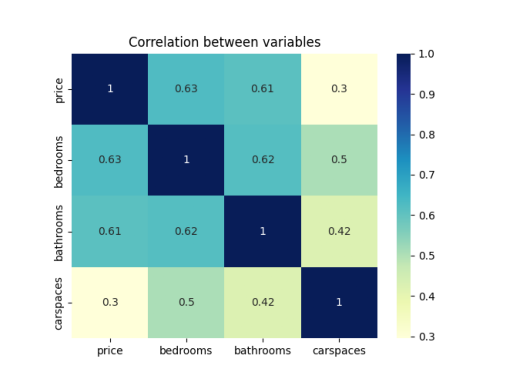

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

internal_corrleation = mpimg.imread("../plots/interal_correlation.png")
plt.imshow(internal_corrleation)
plt.axis('off')
plt.show()

According to the image, we can see that its bedrooms, bathrooms, and carspaces will affect Price, so let's take a look at their distribution first.

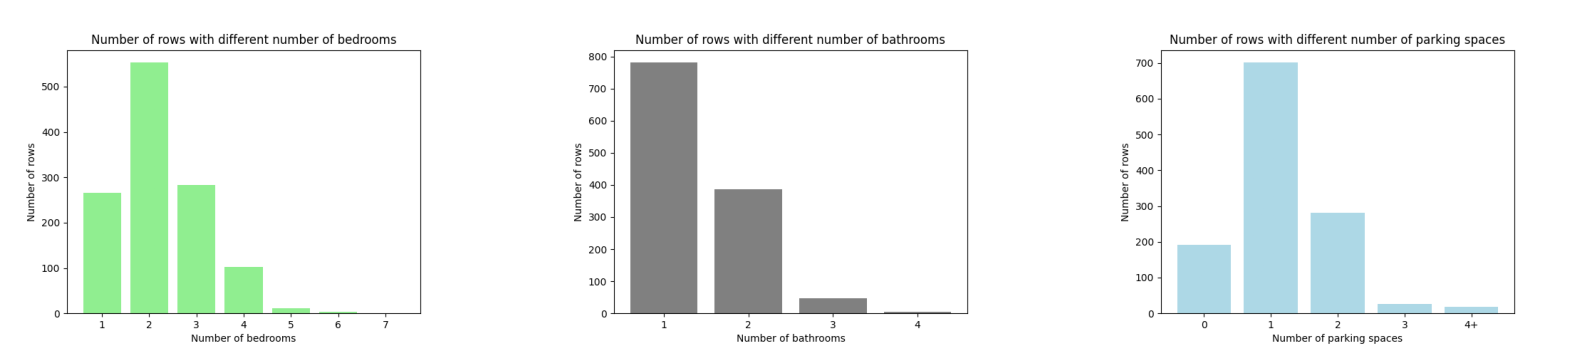

In [14]:
dist1 = mpimg.imread("../plots/internal_distribution/distribution1.png")
dist2 = mpimg.imread("../plots/internal_distribution/distribution2.png")
dist3 = mpimg.imread("../plots/internal_distribution/distribution3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([dist1, dist2, dist3][i])
    plt.axis('off')
plt.savefig("../plots/internal_distribution.png")
plt.show()

Since we had removed the outliers during the preprocessing, most of the remaining bedrooms are bedrooms less than 5. Bathrooms and Carspaces did the same. As can be seen overall, two bedrooms, one bathroom, and one carspace are the most.

Now let's look at what different numbers do to Rent.

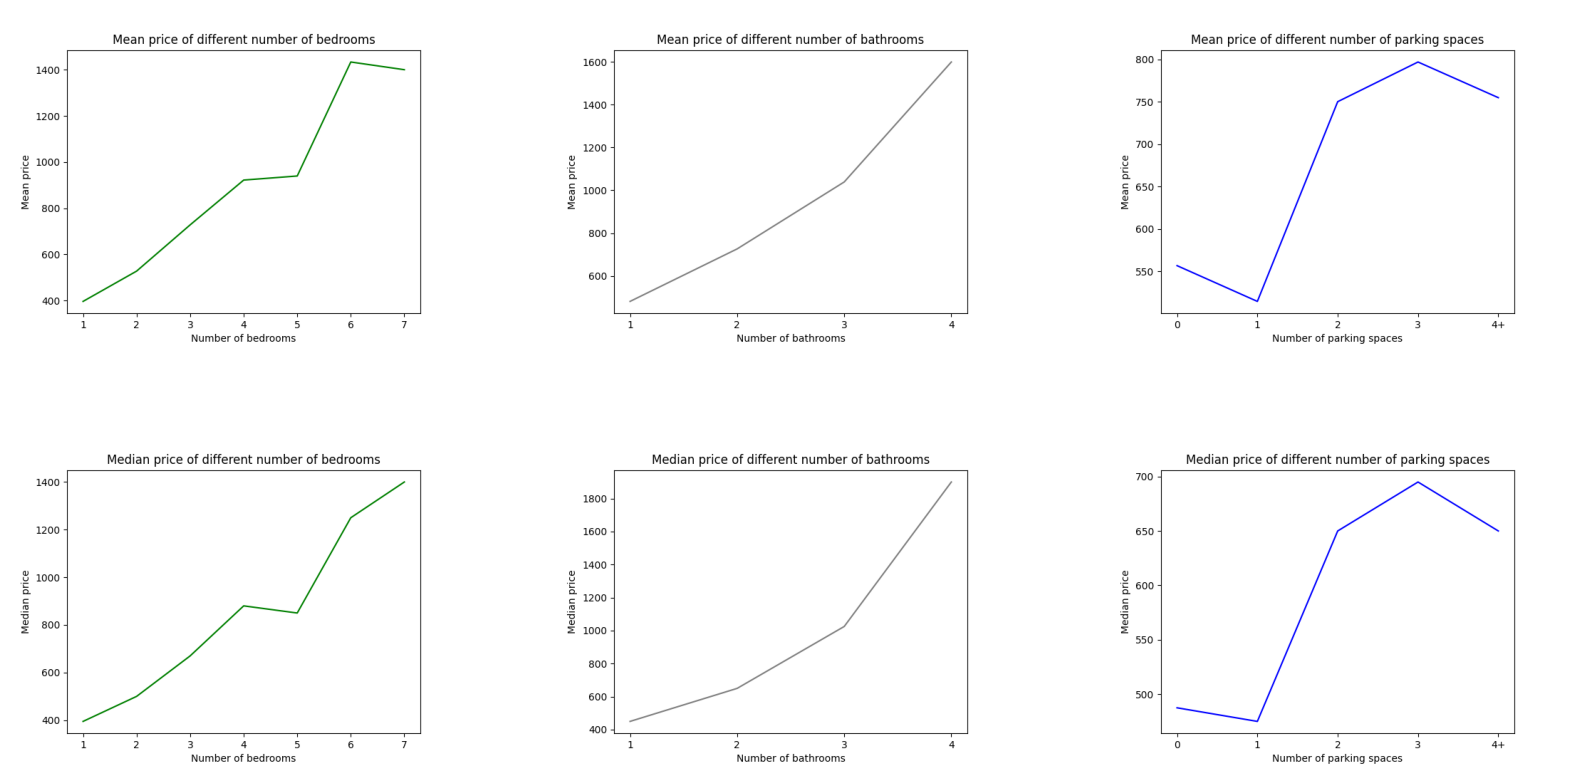

In [15]:
mean1 = mpimg.imread("../plots/mean_price/mean_price1.png")
mean2 = mpimg.imread("../plots/mean_price/mean_price2.png")
mean3 = mpimg.imread("../plots/mean_price/mean_price3.png")
median1 = mpimg.imread("../plots/median_price/median_price1.png")
median2 = mpimg.imread("../plots/median_price/median_price2.png")
median3 = mpimg.imread("../plots/median_price/median_price3.png")

plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow([mean1, mean2, mean3, median1, median2, median3][i])
    plt.axis('off')
plt.savefig("../plots/mean_median.png")
plt.show()

When the number of bedrooms and bathrooms are going up, it is going up. The overall trend in carspaces is less pronounced, fluctuating but up.

Every time they go up, the growth rate of rent changes.

### what is growth rate?

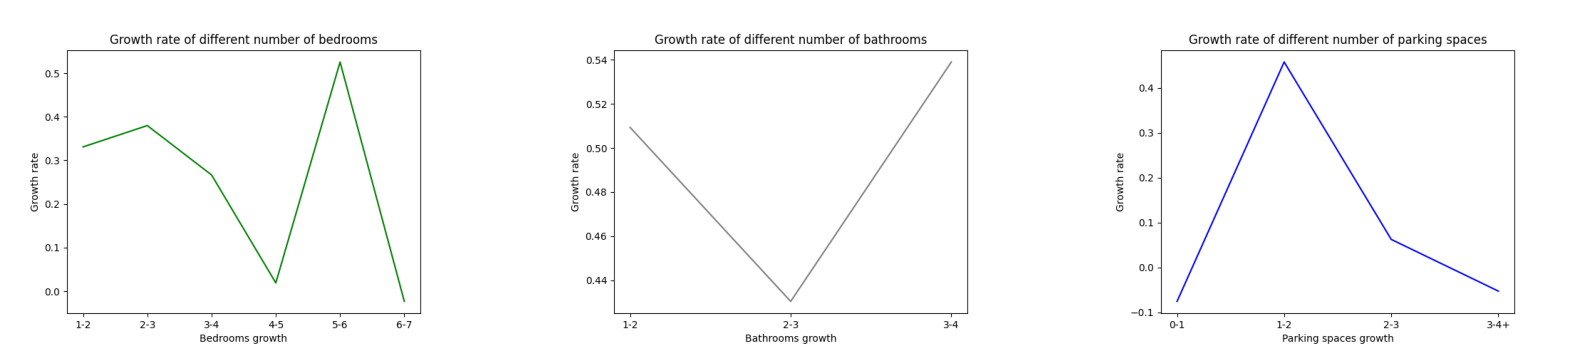

In [16]:
growth1 = mpimg.imread("../plots/growth_rate/growth_rate1.png")
growth2 = mpimg.imread("../plots/growth_rate/growth_rate2.png")
growth3 = mpimg.imread("../plots/growth_rate/growth_rate3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([growth1, growth2, growth3][i])
    plt.axis('off')
plt.savefig("../plots/growth_rate.png")
plt.show()

The change in growth rate fluctuates greatly. We saw the bathrooms go from 2 to 3, and the growth rate was not that high. And when carspaces are enough, more parking areas won't make rent go up.

In addition to these three features, another feature can be considered: Property Type.

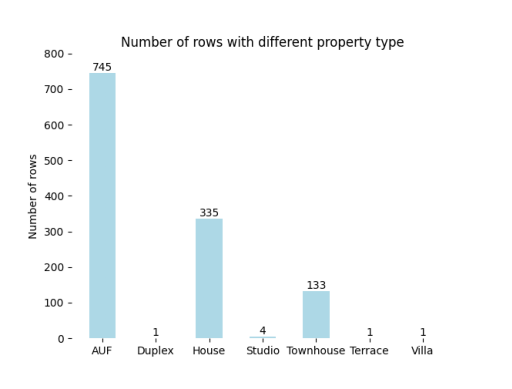

In [17]:
dist4 = mpimg.imread("../plots/internal_distribution/distribution4.png")

plt.imshow(dist4)
plt.axis('off')
plt.show()

This plot is only relating to sample! Normally, there would be a lot of studios but there are not many in this data.

As you can see, the main three are AUF (ApartmentUnitFlat), House and Townhouse. Their mean prices are 488, 741 and 739, respectively.

After discussing the distribution and influence of a feature itself, we want to explore their relationship.

First of all, different features will show different mean prices under different property types.

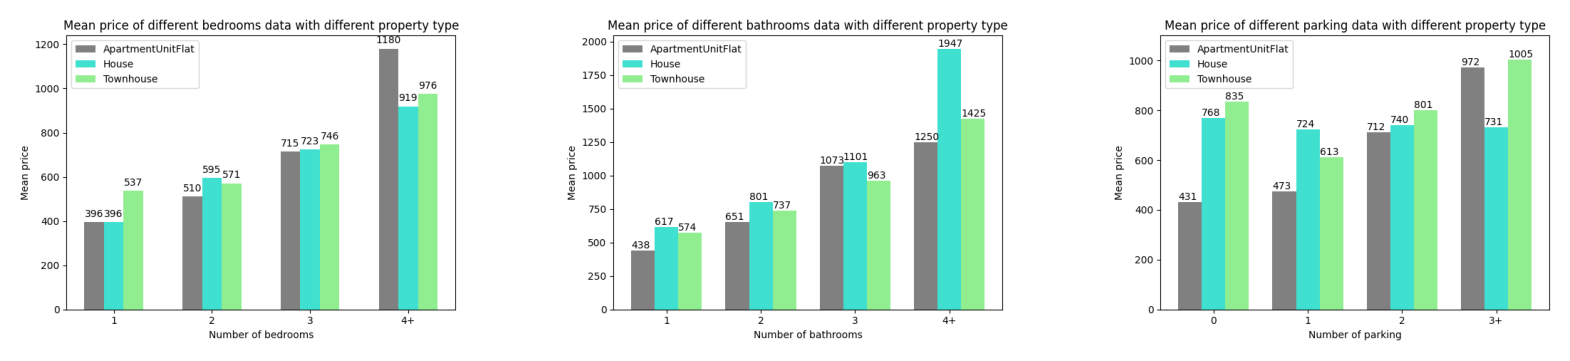

In [18]:
mean11 = mpimg.imread("../plots/internal_relationship/mean1.png")
mean12 = mpimg.imread("../plots/internal_relationship/mean2.png")
mean13 = mpimg.imread("../plots/internal_relationship/mean3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([mean11, mean12, mean13][i])
    plt.axis('off')
plt.savefig("../plots/internal_relationship/mean.png")
plt.show()

In addition, we also explore the impact of different house configurations on rent. 

For example, one bedoom with one bathroom, two bedoom with one bathroom and two bedoom with two bathrooms.

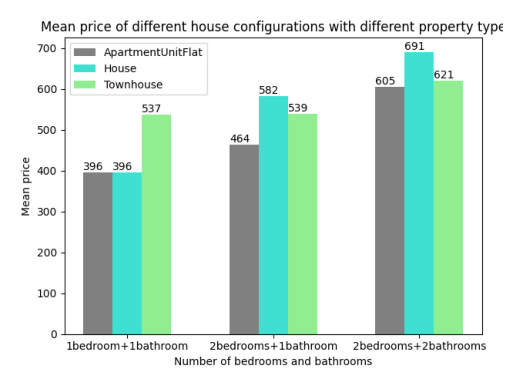

In [19]:
bed_bath = mpimg.imread("../plots/internal_relationship/1b1b_2b1b_2b2b_with_different_property_type.png")
plt.imshow(bed_bath)
plt.axis('off')
plt.show()

As can be seen from the figure, the configuration of the house has no great influence on the price of the townhouse. And the other two go up in price.

Another point I can find out is from the bathrooms if the number of bedrooms is greater than or equal to rent.

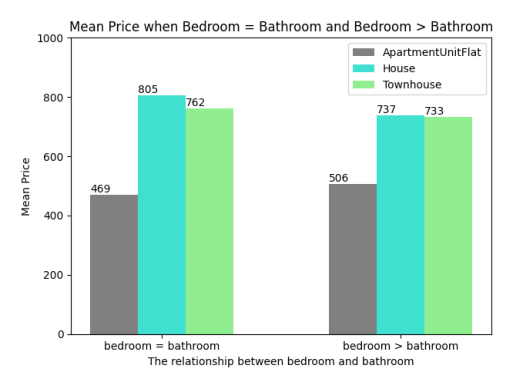

In [20]:
relationship_bed_bath = mpimg.imread("../plots/internal_relationship/both_of_bedrooms_and_bathrooms_affect_rent.png")
plt.imshow(relationship_bed_bath)
plt.axis('off')
plt.show()

There was some improvement for house, but not much improvement for the other two types of houses.

### External features

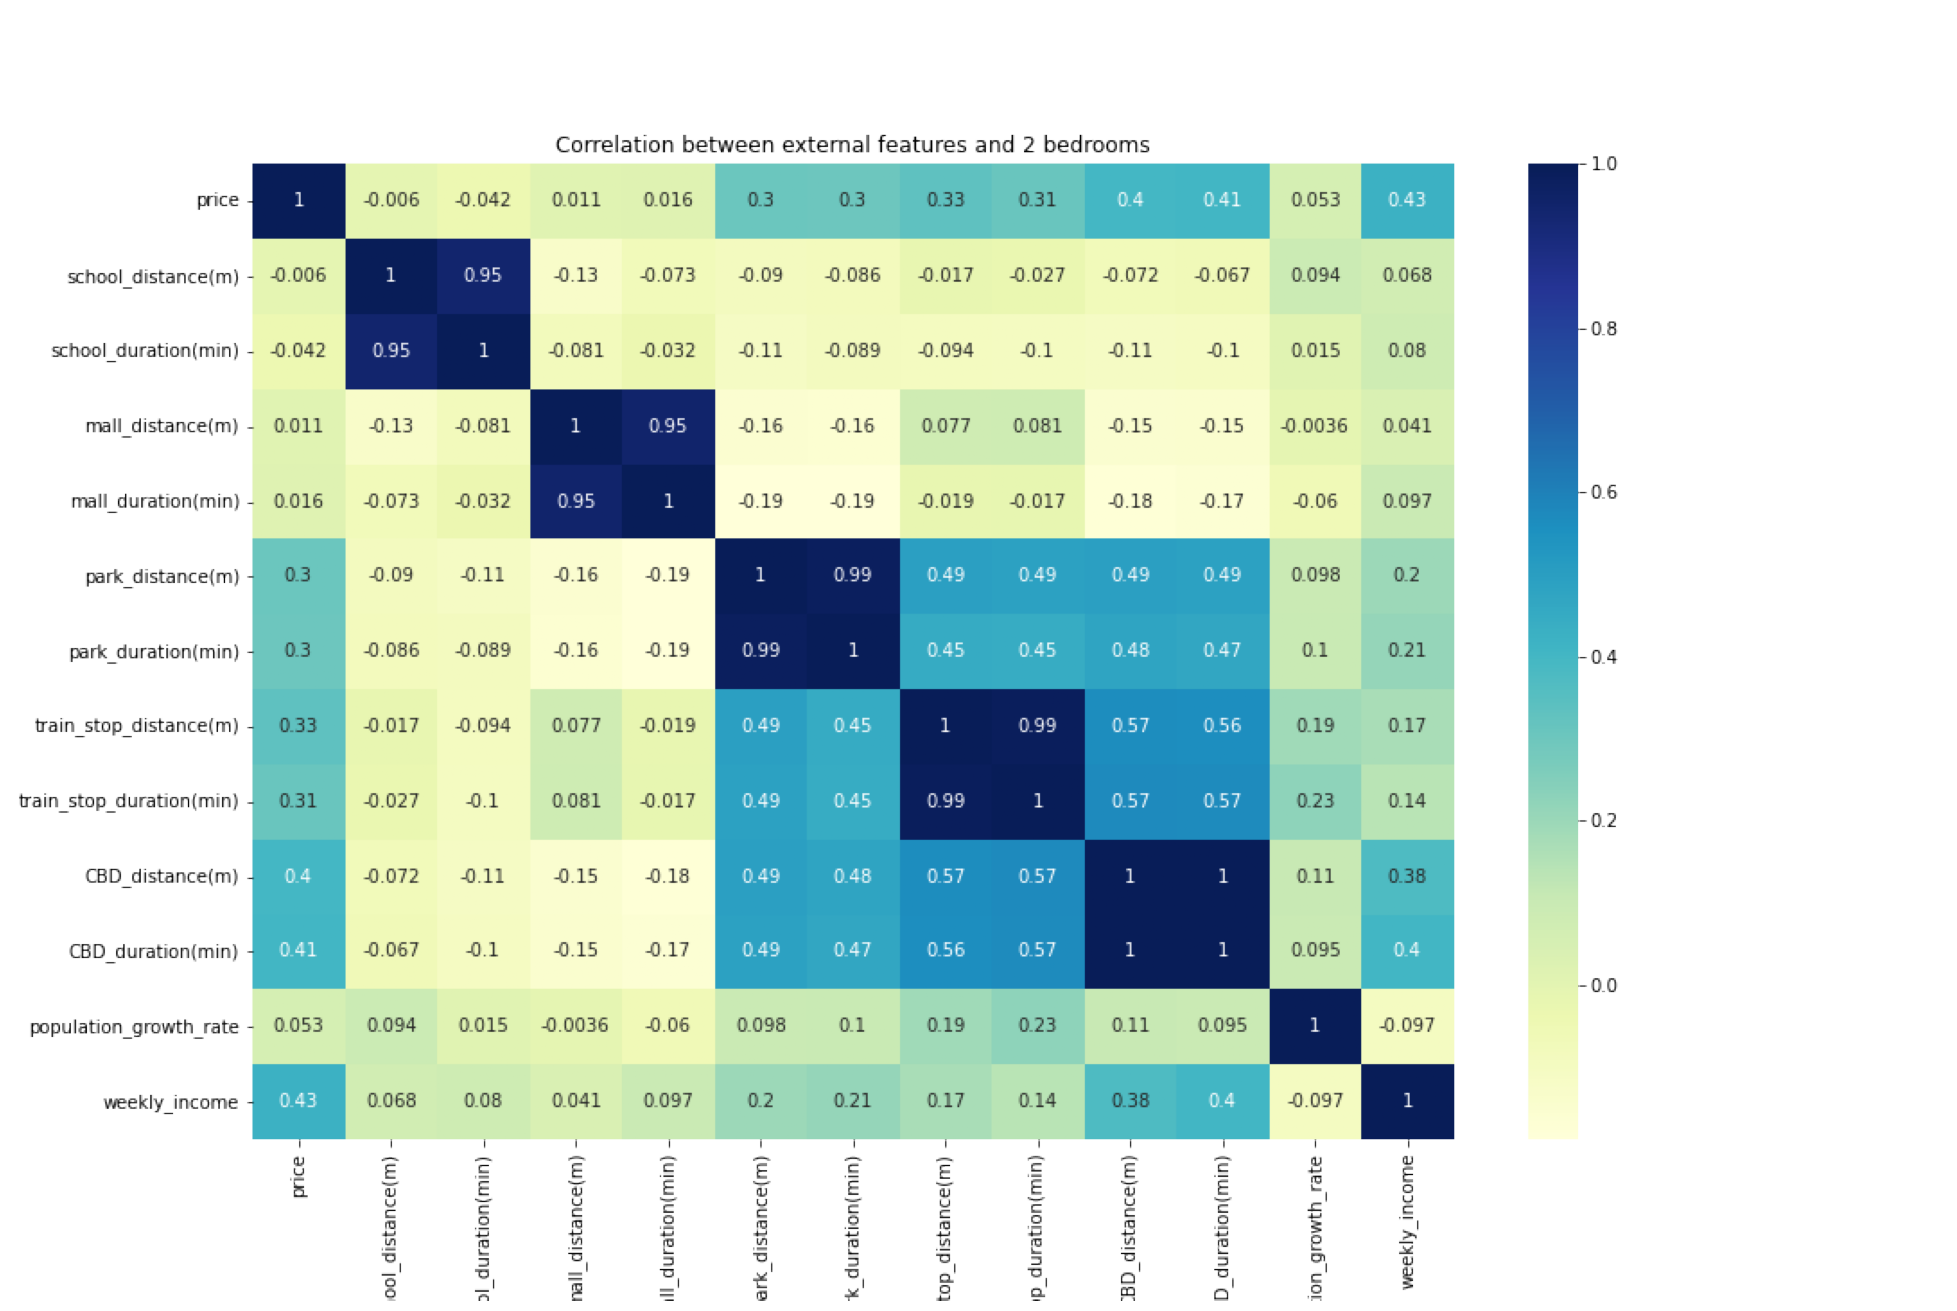

In [21]:
plt.figure(figsize=(25,20))
external_corrleation_2bedrooms = mpimg.imread("../plots/external_correlation_2bedrooms.png")
plt.imshow(external_corrleation_2bedrooms)
plt.axis('off')
plt.show()

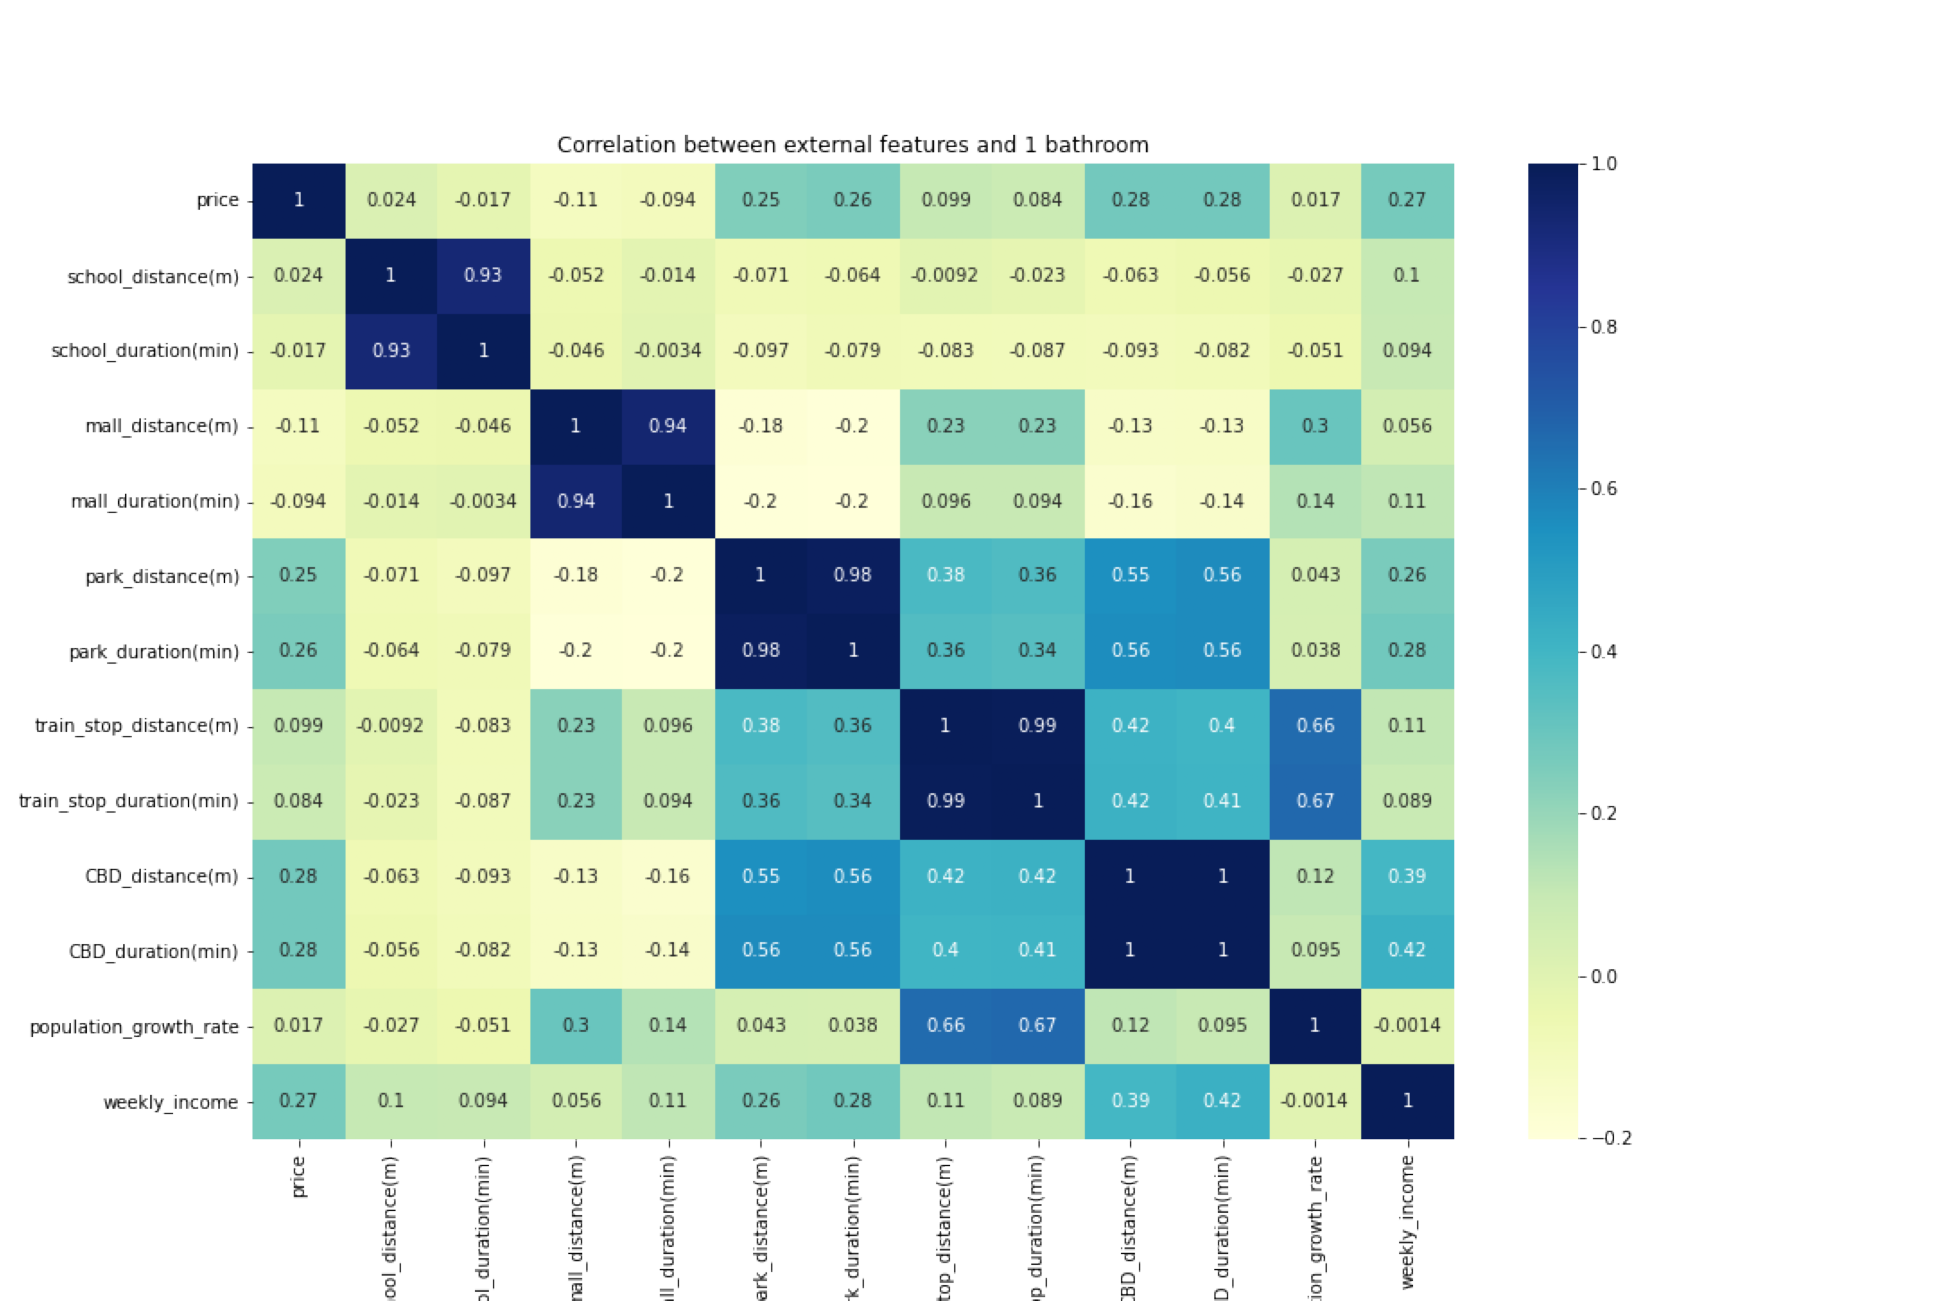

In [22]:
plt.figure(figsize=(25,20))
external_corrleation_1bathroom = mpimg.imread("../plots/external_correlation_1bathroom.png")
plt.imshow(external_corrleation_1bathroom)
plt.axis('off')
plt.show()

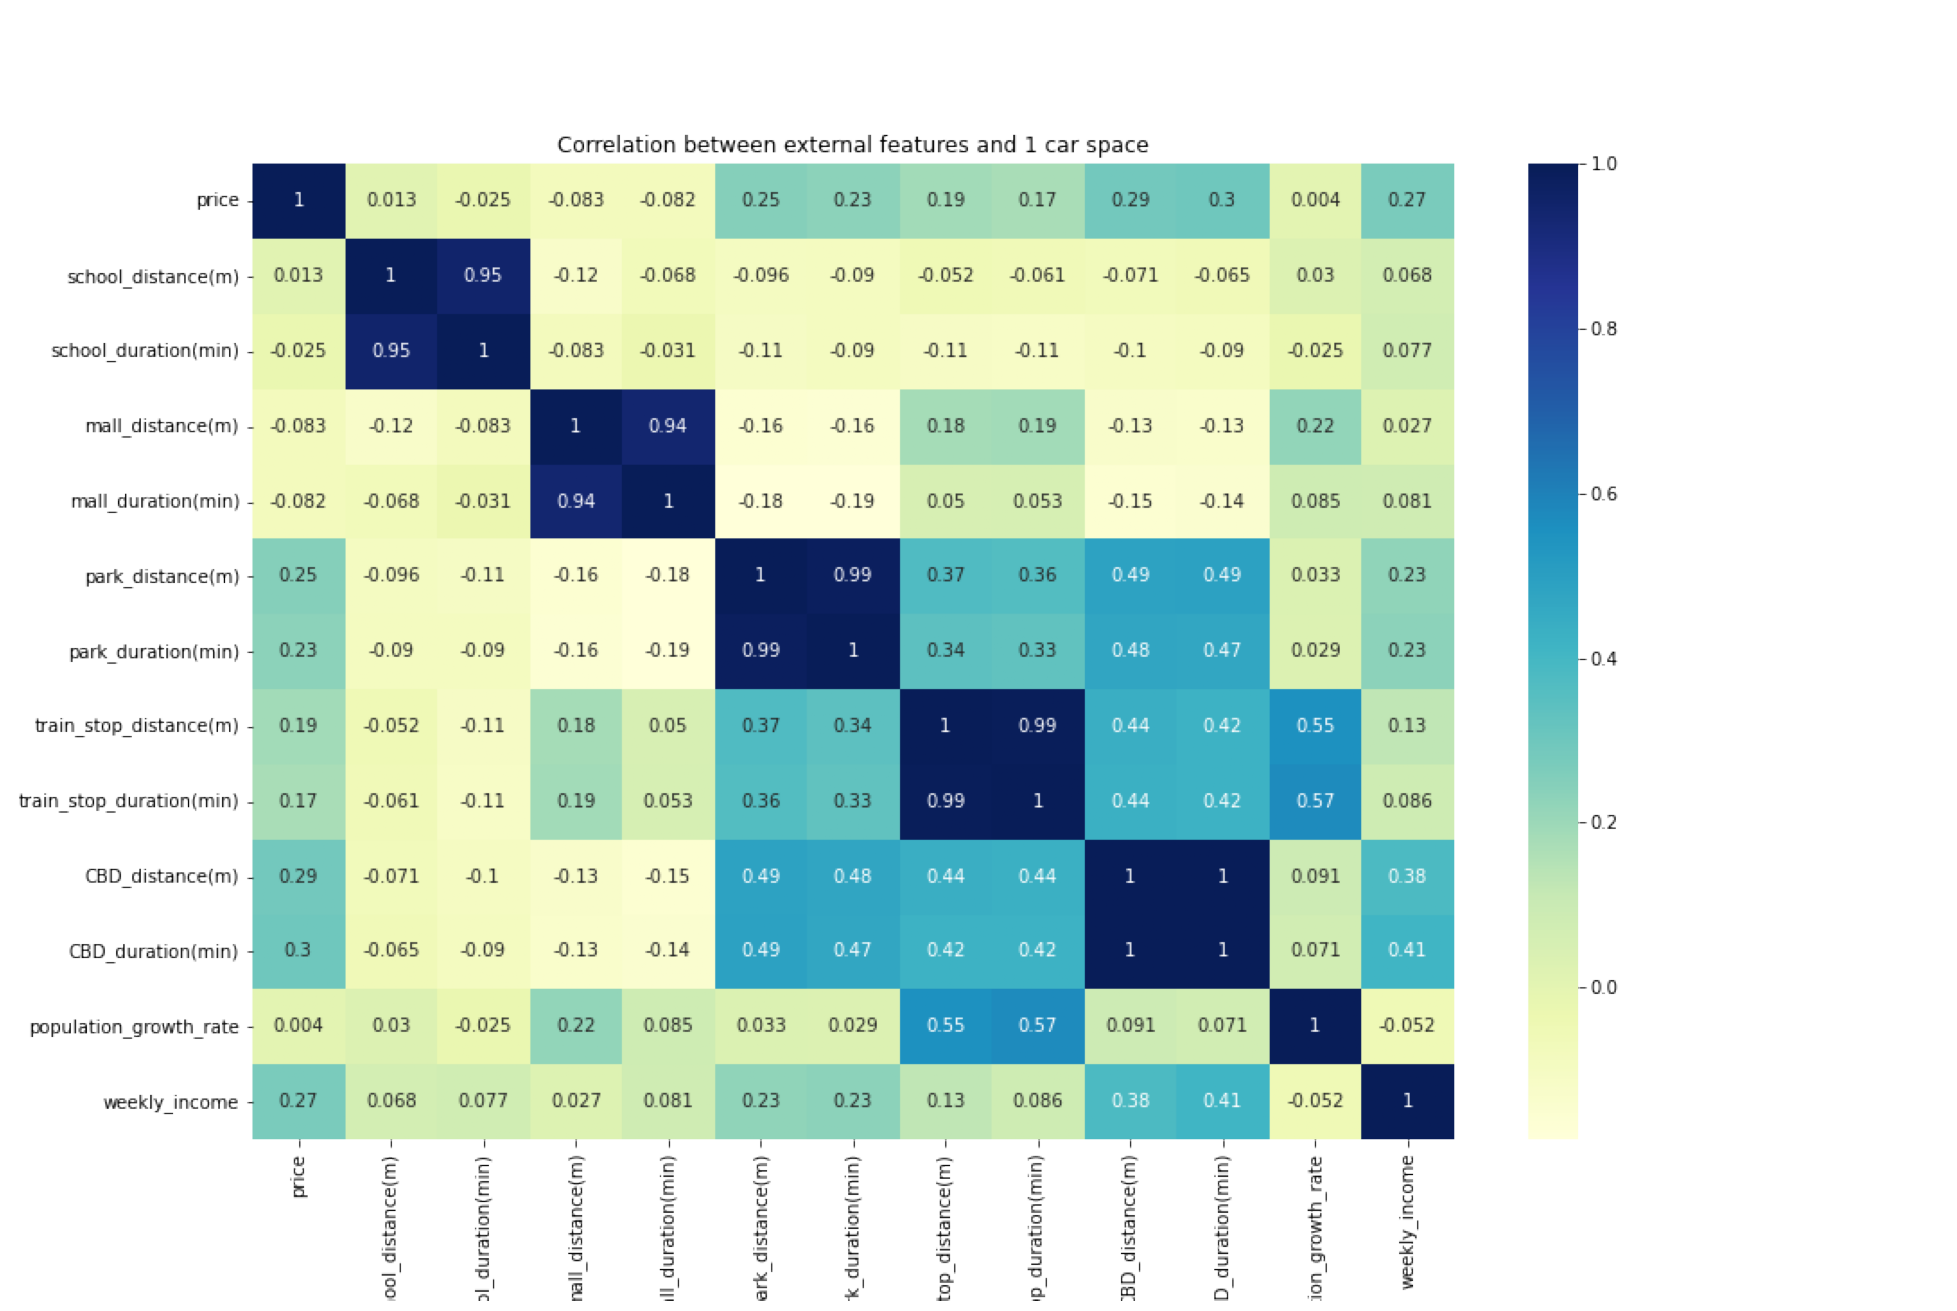

In [23]:
plt.figure(figsize=(25,20))
external_corrleation_1carspace = mpimg.imread("../plots/external_correlation_1carspace.png")
plt.imshow(external_corrleation_1carspace)
plt.axis('off')
plt.show()

## Second Question: What are the top 10 suburbs with the highest predicted growth rate?

#### Past rent dataset from 'https://www.dffh.vic.gov.au/publications/rental-report', which contain the median rent in every suburb for each quarter from 2000 to 2022.

#### We choose population density and weekly income as features to predict the future 3-years rent price for both houses and apartments thoughtout Victoria.

### Creat dataframe

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np

In [16]:
dataset = pd.read_csv('../data/curated/dataset_for_model.csv', index_col = 0)
dataset.head()

,rent,income,population
0,472.50,1249.52,3317.0
1,472.50,1249.52,3317.0
2,393.75,1194.02,4267.0
3,515.00,1032.40,3867.0
4,351.75,762.65,9913.0


## Modelling

#### As we are aiming to do the prediction, we choose linear regression and random forest to fit the model.

In [17]:
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, 0].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

### Linear Regression

In [18]:
#First we choose linear regression to fit the model
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
#evaluate the linear regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))


Mean Absolute Error: 41.91224170109746
Mean Squared Error: 2905.013897403911
Root Mean Squared Error: 53.89818083575651


#### Random Forest 

In [19]:
# random forest regression
regressor = RandomForestRegressor(n_estimators=40, bootstrap = True, max_depth = 20, min_samples_leaf = 1, min_samples_split = 10, random_state=60)
regressor.fit(X_train, y_train)
y_pred_rf = regressor.predict(X_test)
random_forest_error=y_pred_rf-y_test
# evaluate random forest
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 32.78373503687157
Mean Squared Error: 1939.2258904197674
Root Mean Squared Error: 44.0366425879604


#### According to the evaluation for linear forest and linear regression above, Random forest have a lower RMSE. Therefore, Random forest performs better here.

### Rate

In [14]:
rate = pd.read_csv('../data/curated/top10_suburb.csv', index_col = 0)
rate

,postcode,2025_pre,2025_22_rate,suburb
152,3300,490.420210,0.582001,Hamilton
5,3052,440.549392,0.400793,Parkville
11,3184,579.671729,0.380171,Elwood
17,3181,553.678965,0.367109,Prahran
18,3181,553.678965,0.367109,Windsor
137,3357,498.962350,0.367020,Buninyong
156,3840,386.101054,0.354741,Morwell
109,3134,563.514800,0.341702,Ringwood
54,3194,584.959142,0.314515,Mentone
26,3124,596.418301,0.282620,Camberwell


### Limitation

#### Limitation: The selection model is not considered comprehensive enough, and the features we used (population density and weekly income) from 23 to 25 years in this step are all predicted by past data, and errors will occur. Apart from that, the suburbs that we use to are not complete and there may be omissions.

#### Suggestion: More models can be tried in the future. For example, Time Series is another model that can predict future rent by using past rent over time. Otherwise more complete dataset is better.

## Third Question: What are the most liveable and affordable suburbs according to your chosen metrics?

Liveable - surrounding facilities (CBD, park, train stop, school, mall) and population.

Affordable - weekly income and rent. yearly income